In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os
from PIL import Image
import time
import re

In [ ]:
#Librerias NN
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

from skimage.feature import hog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


#Lectura de imagenes procesadas

In [ ]:
df_falciparum = pd.read_pickle('/content/drive/Shareddrives/2024_RedesNeuronales/Proyecto Final/Primer avance/ImagenesProcesadas/falciparum_parte1.pkl').iloc[:50000]
df_vivax = pd.read_pickle('/content/drive/Shareddrives/2024_RedesNeuronales/Proyecto Final/Primer avance/ImagenesProcesadas/Vivax_parte1.pkl').iloc[:50000]

In [ ]:
df_falciparum['Categoría'] = df_falciparum['es_parasito'].apply(lambda x: 1 if x == 1 else 0)
df_falciparum

,id_recorte,x_centro,y_centro,x_start,x_end,y_start,y_end,recorte,ID_nota,es_parasito,paciente,imagen,especie,Categoría
0,1,1291,2408,1269,1313,2386,2430,"[[[235, 224, 241], [236, 228, 243], [234, 226,...",NaN,0,TF100_CS39,20170829_210416,1,0
1,2,2613,1441,2591,2635,1419,1463,"[[[178, 147, 206], [175, 144, 203], [174, 140,...",NaN,0,TF100_CS39,20170829_210416,1,0
2,3,2389,1099,2367,2411,1077,1121,"[[[209, 177, 214], [208, 176, 213], [207, 175,...",8-4,1,TF100_CS39,20170829_210416,1,1
3,4,2559,601,2537,2581,579,623,"[[[204, 164, 217], [205, 167, 218], [208, 170,...",8-1,1,TF100_CS39,20170829_210416,1,1
4,5,2328,1196,2306,2350,1174,1218,"[[[203, 171, 210], [199, 167, 206], [202, 167,...",8-5,1,TF100_CS39,20170829_210416,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,2613,1441,2591,2635,1419,1463,"[[[178, 147, 206], [175, 144, 203], [174, 140,...",NaN,0,TF100_CS39,20170829_210416,1,0
49996,3,2389,1099,2367,2411,1077,1121,"[[[209, 177, 214], [208, 176, 213], [207, 175,...",8-4,1,TF100_CS39,20170829_210416,1,1
49997,4,2559,601,2537,2581,579,623,"[[[204, 164, 217], [205, 167, 218], [208, 170,...",8-1,1,TF100_CS39,20170829_210416,1,1
49998,5,2328,1196,2306,2350,1174,1218,"[[[203, 171, 210], [199, 167, 206], [202, 167,...",8-5,1,TF100_CS39,20170829_210416,1,1


In [ ]:
df_vivax['Categoría'] = df_vivax['es_parasito'].apply(lambda x: 2 if x == 1 else 0)
df_vivax

,id_recorte,x_centro,y_centro,x_start,x_end,y_start,y_end,recorte,ID_nota,es_parasito,paciente,imagen,especie,Categoría
0,1,2053,1247,2031,2075,1225,1269,"[[[163, 142, 198], [164, 143, 200], [164, 143,...",0-12,1,PvTk1,20190404_153307,0,2
1,2,3204,959,3182,3226,937,981,"[[[212, 188, 220], [209, 183, 218], [197, 169,...",NaN,0,PvTk1,20190404_153307,0,0
2,3,1680,1147,1658,1702,1125,1169,"[[[190, 140, 203], [183, 133, 196], [172, 120,...",NaN,0,PvTk1,20190404_153307,0,0
3,4,1280,1369,1258,1302,1347,1391,"[[[220, 199, 218], [217, 196, 215], [216, 195,...",NaN,0,PvTk1,20190404_153307,0,0
4,5,2124,446,2102,2146,424,468,"[[[207, 193, 216], [209, 195, 218], [209, 195,...",0-6,1,PvTk1,20190404_153307,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,19,3333,1827,3311,3355,1805,1849,"[[[229, 217, 229], [227, 215, 227], [227, 215,...",3-33,1,PvTk1,20190404_154352,0,2
49996,20,1320,1000,1298,1342,978,1022,"[[[219, 205, 218], [219, 205, 218], [220, 206,...",NaN,0,PvTk1,20190404_154352,0,0
49997,21,1154,1754,1132,1176,1732,1776,"[[[168, 85, 177], [164, 72, 173], [163, 64, 17...",NaN,0,PvTk1,20190404_154352,0,0
49998,22,2469,725,2447,2491,703,747,"[[[220, 213, 220], [219, 212, 219], [221, 214,...",NaN,0,PvTk1,20190404_154352,0,0


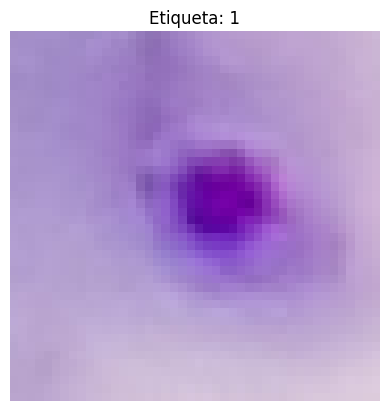

(44, 44, 3)


In [ ]:
# Seleccionar una fila del DataFrame para visualizar
fila = 0  # imágenes
img = df_vivax['recorte'].iloc[fila]  # Obtener el array de la columna 'recorte'

# Mostrar la imagen
plt.imshow(img.astype('uint8'))
plt.title(f"Etiqueta: {df_vivax['es_parasito'].iloc[fila]}")  # Título con la etiqueta 'es_parasito'
plt.axis('off')  # Quitar los ejes
plt.show()

print(img.shape)

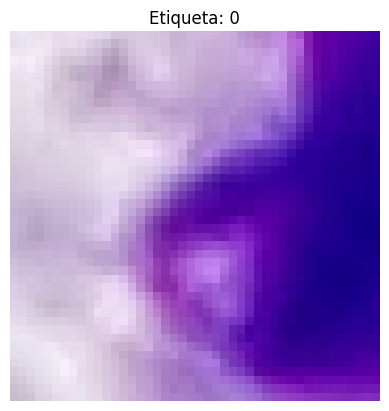

(44, 44, 3)


In [ ]:
# Seleccionar una fila del DataFrame para visualizar
fila = 0  # imágenes
img = df_falciparum['recorte'].iloc[fila]  # Obtener el array de la columna 'recorte'

# Mostrar la imagen
plt.imshow(img.astype('uint8'))
plt.title(f"Etiqueta: {df_falciparum['es_parasito'].iloc[fila]}")  # Título con la etiqueta 'es_parasito'
plt.axis('off')  # Quitar los ejes
plt.show()

print(img.shape)

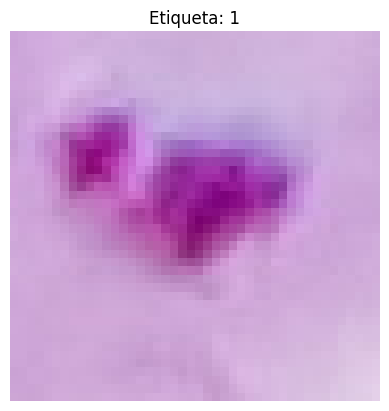

In [ ]:
# Seleccionar una fila del DataFrame para visualizar
fila = 3
img = df_falciparum['recorte'].iloc[fila]  # Obtener el array de la columna 'recorte'

# Mostrar la imagen
plt.imshow(img.astype('uint8'))
plt.title(f"Etiqueta: {df_falciparum['es_parasito'].iloc[fila]}")  # Título con la etiqueta 'es_parasito'
plt.axis('off')  # Quitar los ejes
plt.show()


# Preprocesamiento para entrada de MLP

In [ ]:
n = 1500  # Número de muestras de parásitos a tomar

# Factor de ajuste para no parásitos (puedes modificarlo)
factor_no_parasitos = 0.5  # Tomará un 50% de `n`

# Filtrar las filas de cada clase en falciparum
parasitos_fal = df_falciparum[df_falciparum['es_parasito'] == 1]
no_parasitos_fal = df_falciparum[df_falciparum['es_parasito'] == 0]

# Filtrar las filas de cada clase en vivax
parasitos_viv = df_vivax[df_vivax['es_parasito'] == 1]
no_parasitos_viv = df_vivax[df_vivax['es_parasito'] == 0]

# Tomar una muestra de n para cada grupo
muestra_parasitos_fal = parasitos_fal.sample(n=n, random_state=42)
muestra_no_parasitos_fal = no_parasitos_fal.sample(n=int(n * factor_no_parasitos), random_state=42)

muestra_parasitos_viv = parasitos_viv.sample(n=n, random_state=42)
muestra_no_parasitos_viv = no_parasitos_viv.sample(n=int(n * factor_no_parasitos), random_state=42)


# Combinar ambas muestras
df_balanceado = pd.concat([muestra_parasitos_fal, muestra_no_parasitos_fal,muestra_parasitos_viv,muestra_no_parasitos_viv])

# Mezclar las filas del nuevo dataset balanceado
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)  # Mezcla completa
df_balanceado


,id_recorte,x_centro,y_centro,x_start,x_end,y_start,y_end,recorte,ID_nota,es_parasito,paciente,imagen,especie,Categoría
0,20,2665,1265,2643,2687,1243,1287,"[[[182, 167, 210], [182, 167, 210], [183, 168,...",9-12,1,PvTk1,20190404_151312,0,2
1,16,1500,2031,1478,1522,2009,2053,"[[[221, 196, 217], [220, 195, 216], [221, 196,...",0-14,1,PvTk1,20190404_153307,0,2
2,5,2124,446,2102,2146,424,468,"[[[207, 193, 216], [209, 195, 218], [209, 195,...",0-6,1,PvTk1,20190404_153307,0,2
3,16,1500,2031,1478,1522,2009,2053,"[[[221, 196, 217], [220, 195, 216], [221, 196,...",0-14,1,PvTk1,20190404_153307,0,2
4,11,1430,747,1408,1452,725,769,"[[[220, 197, 223], [219, 196, 222], [219, 195,...",8-2,1,TF100_CS39,20170829_210416,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,27,2354,1377,2332,2376,1355,1399,"[[[229, 213, 224], [228, 212, 223], [229, 213,...",NaN,0,PvTk1,20190404_153307,0,0
4496,2,2427,953,2405,2449,931,975,"[[[227, 208, 228], [227, 205, 228], [225, 203,...",3-1,1,TF100_CS39,20170829_205620,1,1
4497,25,2424,2434,2402,2446,2412,2456,"[[[164, 85, 177], [160, 79, 174], [151, 65, 16...",0-16,1,PvTk1,20190404_153307,0,2
4498,17,1459,1160,1437,1481,1138,1182,"[[[230, 218, 220], [230, 218, 220], [229, 217,...",NaN,0,PvTk1,20190404_152850,0,0


In [ ]:
df_balanceado[df_balanceado['Categoría']==0]

,id_recorte,x_centro,y_centro,x_start,x_end,y_start,y_end,recorte,ID_nota,es_parasito,paciente,imagen,especie,Categoría
6,14,2404,1081,2382,2426,1059,1103,"[[[220, 198, 221], [219, 197, 220], [219, 195,...",NaN,0,TF100_CS39,20170829_210416,1,0
8,13,2612,1708,2590,2634,1686,1730,"[[[83, 6, 164], [82, 4, 165], [76, 0, 158], [7...",NaN,0,PvTk1,20190404_151312,0,0
17,11,2678,996,2656,2700,974,1018,"[[[225, 216, 221], [225, 216, 221], [226, 217,...",NaN,0,PvTk1,20190404_152216,0,0
19,13,915,1837,893,937,1815,1859,"[[[223, 210, 227], [224, 211, 228], [224, 211,...",NaN,0,TF100_CS39,20170829_210213,1,0
21,15,3159,1708,3137,3181,1686,1730,"[[[229, 212, 228], [228, 211, 227], [228, 211,...",NaN,0,TF100_CS39,20170829_210416,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,26,2479,2427,2457,2501,2405,2449,"[[[222, 208, 225], [223, 206, 224], [224, 207,...",NaN,0,TF100_CS39,20170829_210050,1,0
4484,17,2860,629,2838,2882,607,651,"[[[219, 209, 220], [217, 207, 218], [218, 208,...",NaN,0,PvTk1,20190404_152216,0,0
4490,8,2276,1245,2254,2298,1223,1267,"[[[92, 37, 191], [91, 36, 190], [83, 29, 185],...",NaN,0,TF100_CS39,20170829_210416,1,0
4495,27,2354,1377,2332,2376,1355,1399,"[[[229, 213, 224], [228, 212, 223], [229, 213,...",NaN,0,PvTk1,20190404_153307,0,0


In [ ]:
del df_falciparum, df_vivax

In [ ]:
len(df_balanceado)

4500

Rotar aleatoriamente las imagenes para añadir un poco de variabilidad y que el modelo pueda generalizar mejor

In [ ]:
# Suponiendo que df_balanceado ya tiene las imágenes como arrays en la columna "image"
def rotate_randomly(image):
    angles = [0, 90, 180, 270]  # Ángulos posibles
    angle = np.random.choice(angles)  # Selecciona un ángulo aleatorio
    return tf.image.rot90(image, k=angle // 90)  # Rotar según el ángulo elegido

# Aplicar la rotación directamente sobre la columna de imágenes
df_balanceado['recorte'] = df_balanceado['recorte'].apply(lambda img: rotate_randomly(tf.convert_to_tensor(img)).numpy())

In [ ]:
# Función para convertir a escala de grises
def convertir_a_grises(imagen_rgb):
    return cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

# Función para normalizar la imagen
def normalizar_imagen(imagen_gris):
    return imagen_gris / 255.0  # Normaliza al rango [0,1]

def extraer_hog(imagen_gris_normalizada):
    features, _ = hog(imagen_gris_normalizada, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, block_norm="L2-Hys")
    return features

# Aplicar la conversión a escala de grises
df_balanceado['recorte_gris'] = df_balanceado['recorte'].apply(convertir_a_grises)

# Normalizar las imágenes en escala de grises
df_balanceado['recorte_normalizado'] = df_balanceado['recorte_gris'].apply(normalizar_imagen)

# Extraer características HOG
df_balanceado['hog_features'] = df_balanceado['recorte_normalizado'].apply(extraer_hog)

# Convertir las características en una matriz NumPy
X1 = np.stack(df_balanceado['hog_features'].values)
#X2 = np.stack(df_balanceado[df_balanceado['es_parasito']==1]['hog_features'].values)

# Convertir y1 a One-Hot Encoding desde el principio
y1 = to_categorical(df_balanceado['Categoría'].values, num_classes=3)  # 3 clases: [0, 1, 2]

# Verificar la forma de los datos
print(f"Forma de X1: {X1.shape}, Forma de y1: {y1.shape}")


Forma de X1: (4500, 576), Forma de y1: (4500, 3)


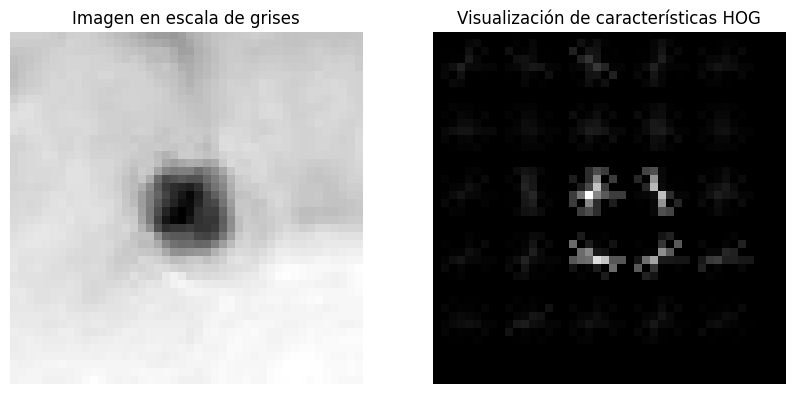

In [ ]:
# Seleccionar una imagen de tu DataFrame (por ejemplo, la primera)
imagen_original = df_balanceado['recorte_gris'].iloc[0]

# Extraer características HOG con la visualización activada
features, imagen_hog = hog(imagen_original, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), visualize=True, block_norm="L2-Hys")

# Graficar la imagen original y la imagen con HOG
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(imagen_original, cmap='gray')
ax[0].set_title("Imagen en escala de grises")
ax[0].axis("off")

ax[1].imshow(imagen_hog, cmap='gray')
ax[1].set_title("Visualización de características HOG")
ax[1].axis("off")

plt.show()


#Modelo 1 Perceptrón multicapa

## División de entrenamiento

In [ ]:
#Division de los datasets para entrenar los dos modelos
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
X1_train.shape[1]

576

## Definición del Perceptrón Multicapa

In [ ]:
# Definir el modelo MLP
model_mlp = Sequential([
    Dense(32, input_shape=(X1_train.shape[1],), activation='relu'),  # Primera capa oculta
    Dropout(0.5),  # Regularización para evitar sobreajuste
    Dense(16, activation='relu'),  # Segunda capa oculta
    Dropout(0.5),  # Más regularización
    Dense(3, activation='softmax')  # 3 clases → Función de activación SOFTMAX
])

# Compilar el modelo
model_mlp.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history_mlp = model_mlp.fit(X1_train, y1_train,
                    validation_split=0.2,  # Usar un 20% del conjunto de entrenamiento para validación
                    epochs=60,  # Ajustar
                    batch_size=32,  # Tamaño del batch
                    verbose=1)  # Muestra detalles del entrenamiento

Epoch 1/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.3395 - loss: 1.1214 - val_accuracy: 0.5190 - val_loss: 1.0156
Epoch 2/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4659 - loss: 1.0364 - val_accuracy: 0.5968 - val_loss: 0.9414
Epoch 3/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5233 - loss: 0.9756 - val_accuracy: 0.6365 - val_loss: 0.8583
Epoch 4/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5777 - loss: 0.9112 - val_accuracy: 0.7095 - val_loss: 0.8135
Epoch 5/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 0.8699 - val_accuracy: 0.7508 - val_loss: 0.7874
Epoch 6/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6252 - loss: 0.8482 - val_accuracy: 0.7762 - val_loss: 0.6959
Epoch 7/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6725 - loss: 0.7876 - val_accuracy: 0.7952 - val_loss: 0.6534
Epoch 8/60
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6748 - loss: 0.7524 - val_accuracy: 0.8127 - val_loss

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss_mlp, accuracy_mlp = model_mlp.evaluate(X1_test, y1_test, verbose=0)
print(f"Precisión en datos de prueba: {accuracy_mlp * 100:.2f}%")

Precisión en datos de prueba: 95.78%


In [ ]:
# Hacer predicciones con el modelo entrenado
y1_pred = model_mlp.predict(X1_test)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Reporte de clasificación:
              precision    recall  f1-score   support

 No Parásito       0.98      0.94      0.96       455
  Falciparum       0.95      0.95      0.95       460
       Vivax       0.94      0.99      0.96       435

    accuracy                           0.96      1350
   macro avg       0.96      0.96      0.96      1350
weighted avg       0.96      0.96      0.96      1350



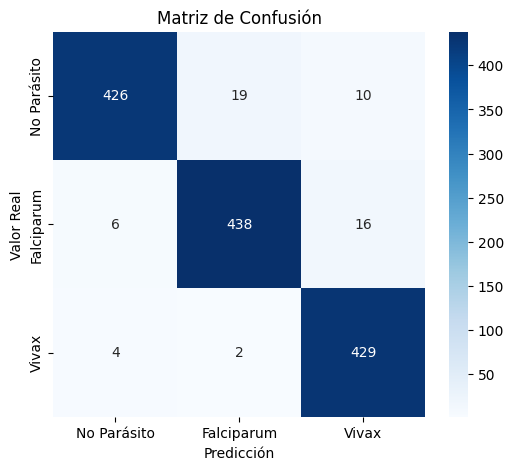

In [ ]:
# Convertir one-hot a etiquetas enteras (si es necesario)
y1_test_int = np.argmax(y1_test, axis=1)  # Convierte [1, 0, 0] en 0, [0, 1, 0] en 1, etc.
y1_pred_int = np.argmax(y1_pred, axis=1)  # Hace lo mismo con las predicciones

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y1_test_int, y1_pred_int, target_names=["No Parásito", "Falciparum", "Vivax"]))

# Matriz de confusión
cm = confusion_matrix(y1_test_int, y1_pred_int)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Parásito", "Falciparum", "Vivax"],
            yticklabels=["No Parásito", "Falciparum", "Vivax"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


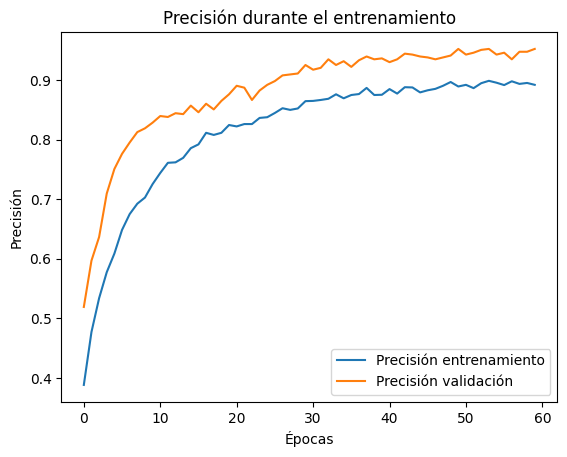

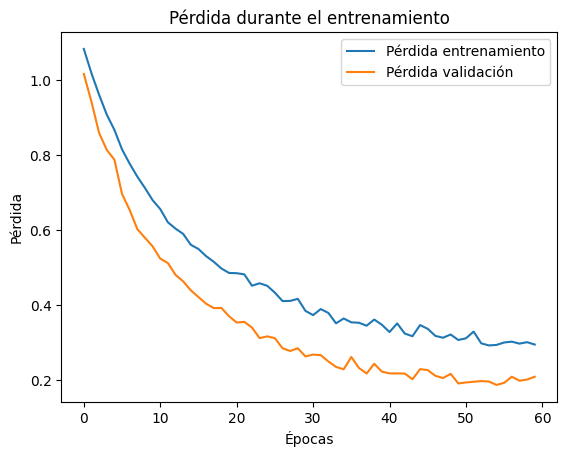

In [ ]:
# Graficar precisión
plt.plot(history_mlp.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_mlp.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar pérdida
plt.plot(history_mlp.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


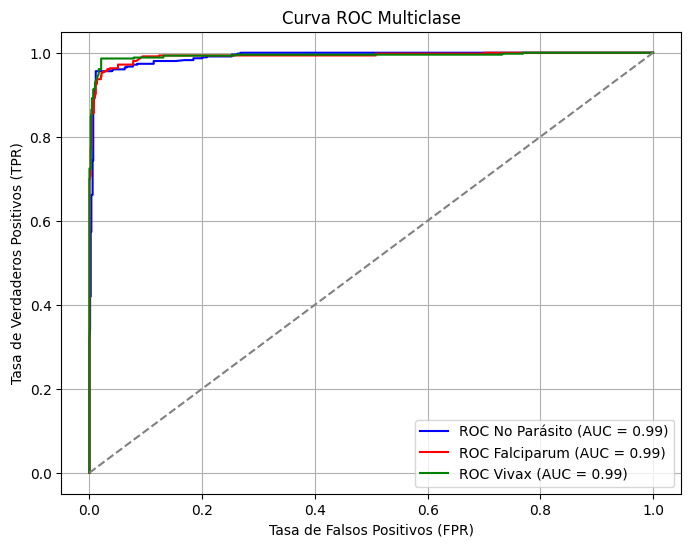

In [ ]:
# Obtener las probabilidades predichas (una por clase)
y1_pred_prob = model_mlp.predict(X1_test)  # Salida (n_samples, 3)

# Convertir las etiquetas reales a One-Hot Encoding si aún no están
if len(y1_test.shape) == 1:
    y1_test = to_categorical(y1_test, num_classes=3)

# Binarizar las etiquetas (one-hot)
y1_test_bin = label_binarize(y1_test.argmax(axis=1), classes=[0, 1, 2])  # Si no está en one-hot, convertir

# Inicializar el gráfico
plt.figure(figsize=(8, 6))

# Colores para cada clase
colors = ['blue', 'red', 'green']
labels = ["No Parásito", "Falciparum", "Vivax"]

# Graficar la curva ROC para cada clase
for i in range(3):  # Tres clases
    fpr, tpr, _ = roc_curve(y1_test_bin[:, i], y1_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'ROC {labels[i]} (AUC = {roc_auc:.2f})')

# Línea diagonal (modelo aleatorio)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configuración del gráfico
plt.title('Curva ROC Multiclase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# CNN

In [ ]:
# Convertir las características en una matriz NumPy
X3 = np.stack(df_balanceado['recorte'].values)
#X2 = np.stack(df_balanceado[df_balanceado['es_parasito']==1]['recorte'].values)

y3 = to_categorical(df_balanceado['Categoría'].values, num_classes=3)



In [ ]:
# Primero dividimos en entrenamiento (80%) y prueba (20%)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

# Luego dividimos el entrenamiento en entrenamiento (80%) y validación (20%)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.25, random_state=42, stratify=y3_train)

# Imprimir tamaños de cada conjunto
print(f"Tamaño total de X3: {len(X3)}")
print(f"Tamaño de X3_train (entrenamiento): {len(X3_train)}")
print(f"Tamaño de X3_val (validación): {len(X3_val)}")
print(f"Tamaño de X3_test (prueba): {len(X3_test)}")

print(f"Tamaño total de y3: {len(y3)}")
print(f"Tamaño de y3_train (entrenamiento): {len(y3_train)}")
print(f"Tamaño de y3_val (validación): {len(y3_val)}")
print(f"Tamaño de y3_test (prueba): {len(y3_test)}")


Tamaño total de X3: 4500
Tamaño de X3_train (entrenamiento): 2700
Tamaño de X3_val (validación): 900
Tamaño de X3_test (prueba): 900
Tamaño total de y3: 4500
Tamaño de y3_train (entrenamiento): 2700
Tamaño de y3_val (validación): 900
Tamaño de y3_test (prueba): 900


In [ ]:
X3.shape

(4500, 44, 44, 3)

In [ ]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(X3.shape[1], X3.shape[2], X3.shape[3])),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Para clasificación binaria
])

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_cnn = model_cnn.fit(X3_train, y3_train, epochs=20,
                    validation_data=(X3_val, y3_val))

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.4458 - loss: 8.1163 - val_accuracy: 0.6933 - val_loss: 0.8374
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7018 - loss: 0.7453 - val_accuracy: 0.6656 - val_loss: 0.7282
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7553 - loss: 0.6114 - val_accuracy: 0.7678 - val_loss: 0.5954
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8074 - loss: 0.5083 - val_accuracy: 0.8411 - val_loss: 0.4454
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8622 - loss: 0.3679 - val_accuracy: 0.8878 - val_loss: 0.3678
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9036 - loss: 0.2667 - val_accuracy: 0.8467 - val_loss: 0.3794
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9113 - loss: 0.2664 - val_accuracy: 0.9078 - val_loss: 0.2587
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9505 - loss: 0.1563 - val_accuracy: 0.9244 - val_loss

In [ ]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X3_test, y3_test)
print(f"Precisión en test: {test_acc_cnn:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9726 - loss: 0.0711
Precisión en test: 0.9733


In [ ]:
# Obtener predicciones en el conjunto de prueba
y3_test_pred_probs_cnn = model_cnn.predict(X3_test)  # Probabilidades
y3_test_pred_cnn = (y3_test_pred_probs_cnn > 0.5).astype(int)  # Convertir a 0 o 1


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


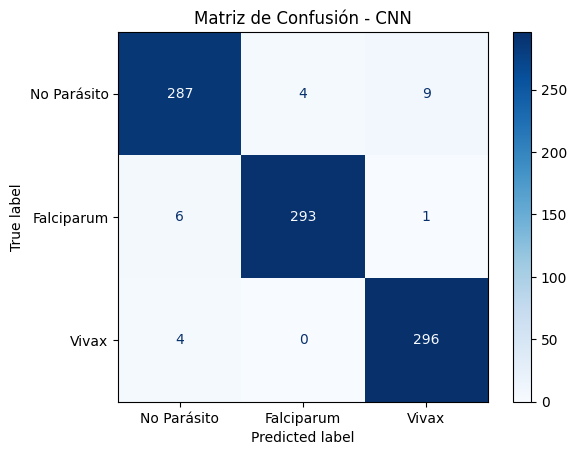

In [ ]:
# Convertir etiquetas de One-Hot a índices enteros
y3_test_int = np.argmax(y3_test, axis=1)  # Si y3_test está en One-Hot, convertir a [0,1,2]
y3_test_pred_int = np.argmax(y3_test_pred_cnn, axis=1)  # Convertir predicciones a clases enteras

# Calcular la matriz de confusión
cm_cnn = confusion_matrix(y3_test_int, y3_test_pred_int)

# Graficar la matriz de confusión
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["No Parásito", "Falciparum", "Vivax"])
disp_cnn.plot(cmap="Blues")
plt.title("Matriz de Confusión - CNN")
plt.show()


In [ ]:
history_cnn.history

{'accuracy': [0.5222222208976746,
  0.7025926113128662,
  0.7725926041603088,
  0.8177777528762817,
  0.8633333444595337,
  0.9074074029922485,
  0.9196296334266663,
  0.9581481218338013,
  0.9344444274902344,
  0.9303703904151917,
  0.9470370411872864,
  0.9607407450675964,
  0.9781481623649597,
  0.9518518447875977,
  0.9529629349708557,
  0.9525926113128662,
  0.95333331823349,
  0.9825925827026367,
  0.982962965965271,
  0.9907407164573669],
 'loss': [2.9291043281555176,
  0.7377608418464661,
  0.5859628915786743,
  0.4846095144748688,
  0.3570493757724762,
  0.2627415060997009,
  0.2279791533946991,
  0.14480985701084137,
  0.1885121911764145,
  0.20151516795158386,
  0.1370125710964203,
  0.12005938589572906,
  0.07491208612918854,
  0.1368306428194046,
  0.12215819209814072,
  0.13162603974342346,
  0.12274617701768875,
  0.05309412255883217,
  0.04890584200620651,
  0.02476968616247177],
 'val_accuracy': [0.6933333277702332,
  0.6655555367469788,
  0.7677778005599976,
  0.84111

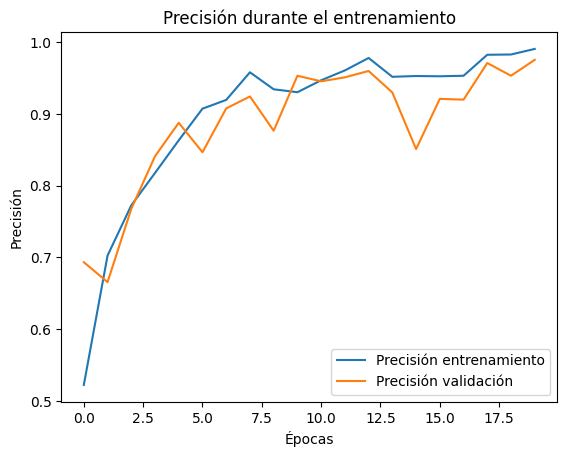

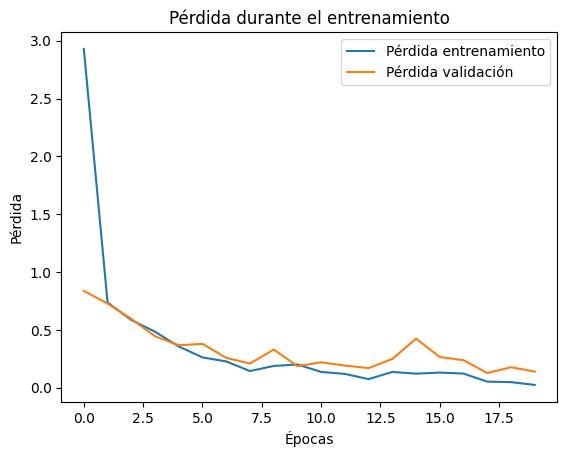

In [ ]:
# Graficar la precisión en entrenamiento y validación
plt.plot(history_cnn.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history_cnn.history['loss'], label='Pérdida entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

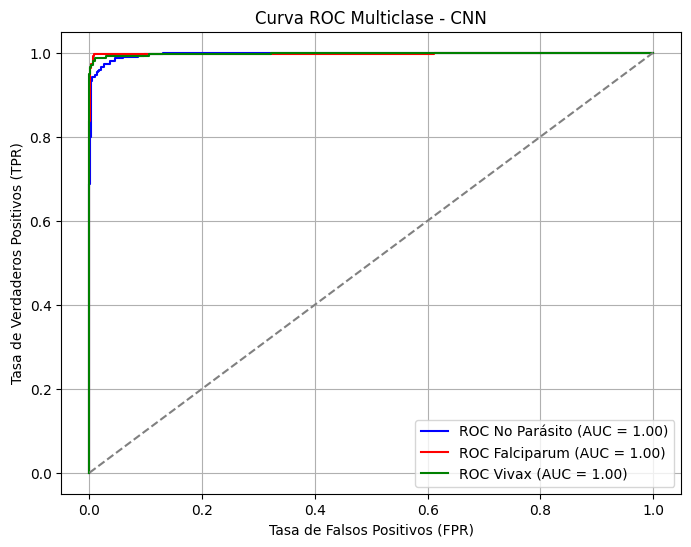

In [ ]:
# Binarizar las etiquetas (One-Hot Encoding) para ROC multiclase
y3_test_bin = label_binarize(y3_test.argmax(axis=1), classes=[0, 1, 2])  # Convertir a matriz binaria si no lo es
y3_test_pred_probs_cnn = np.array(y3_test_pred_probs_cnn)  # Asegurar que es un array NumPy

# Inicializar el gráfico
plt.figure(figsize=(8, 6))

# Colores para cada clase
colors = ['blue', 'red', 'green']
labels = ["No Parásito", "Falciparum", "Vivax"]

# Graficar la curva ROC para cada clase
for i in range(3):  # Tres clases
    fpr, tpr, _ = roc_curve(y3_test_bin[:, i], y3_test_pred_probs_cnn[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'ROC {labels[i]} (AUC = {roc_auc:.2f})')

# Línea diagonal (modelo aleatorio)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Configuración del gráfico
plt.title('Curva ROC Multiclase - CNN')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Calcular métricas
accuracy_cnn = accuracy_score(y3_test_int, y3_test_pred_int)
precision_cnn = precision_score(y3_test_int, y3_test_pred_int, average="weighted")  # Promediado ponderado
recall_cnn = recall_score(y3_test_int, y3_test_pred_int, average="weighted")
f1_cnn = f1_score(y3_test_int, y3_test_pred_int, average="weighted")
auc_score_cnn = roc_auc_score(y3_test, y3_test_pred_probs_cnn, multi_class="ovr")  # Usar One-Hot para ROC

# Mostrar métricas
print(f"Accuracy CNN: {accuracy_cnn:.4f}")
print(f"Precision CNN: {precision_cnn:.4f}")
print(f"Recall CNN: {recall_cnn:.4f}")
print(f"F1-Score CNN: {f1_cnn:.4f}")
print(f"AUC CNN: {auc_score_cnn:.4f}")



Accuracy CNN: 0.9733
Precision CNN: 0.9734
Recall CNN: 0.9733
F1-Score CNN: 0.9733
AUC CNN: 0.9976


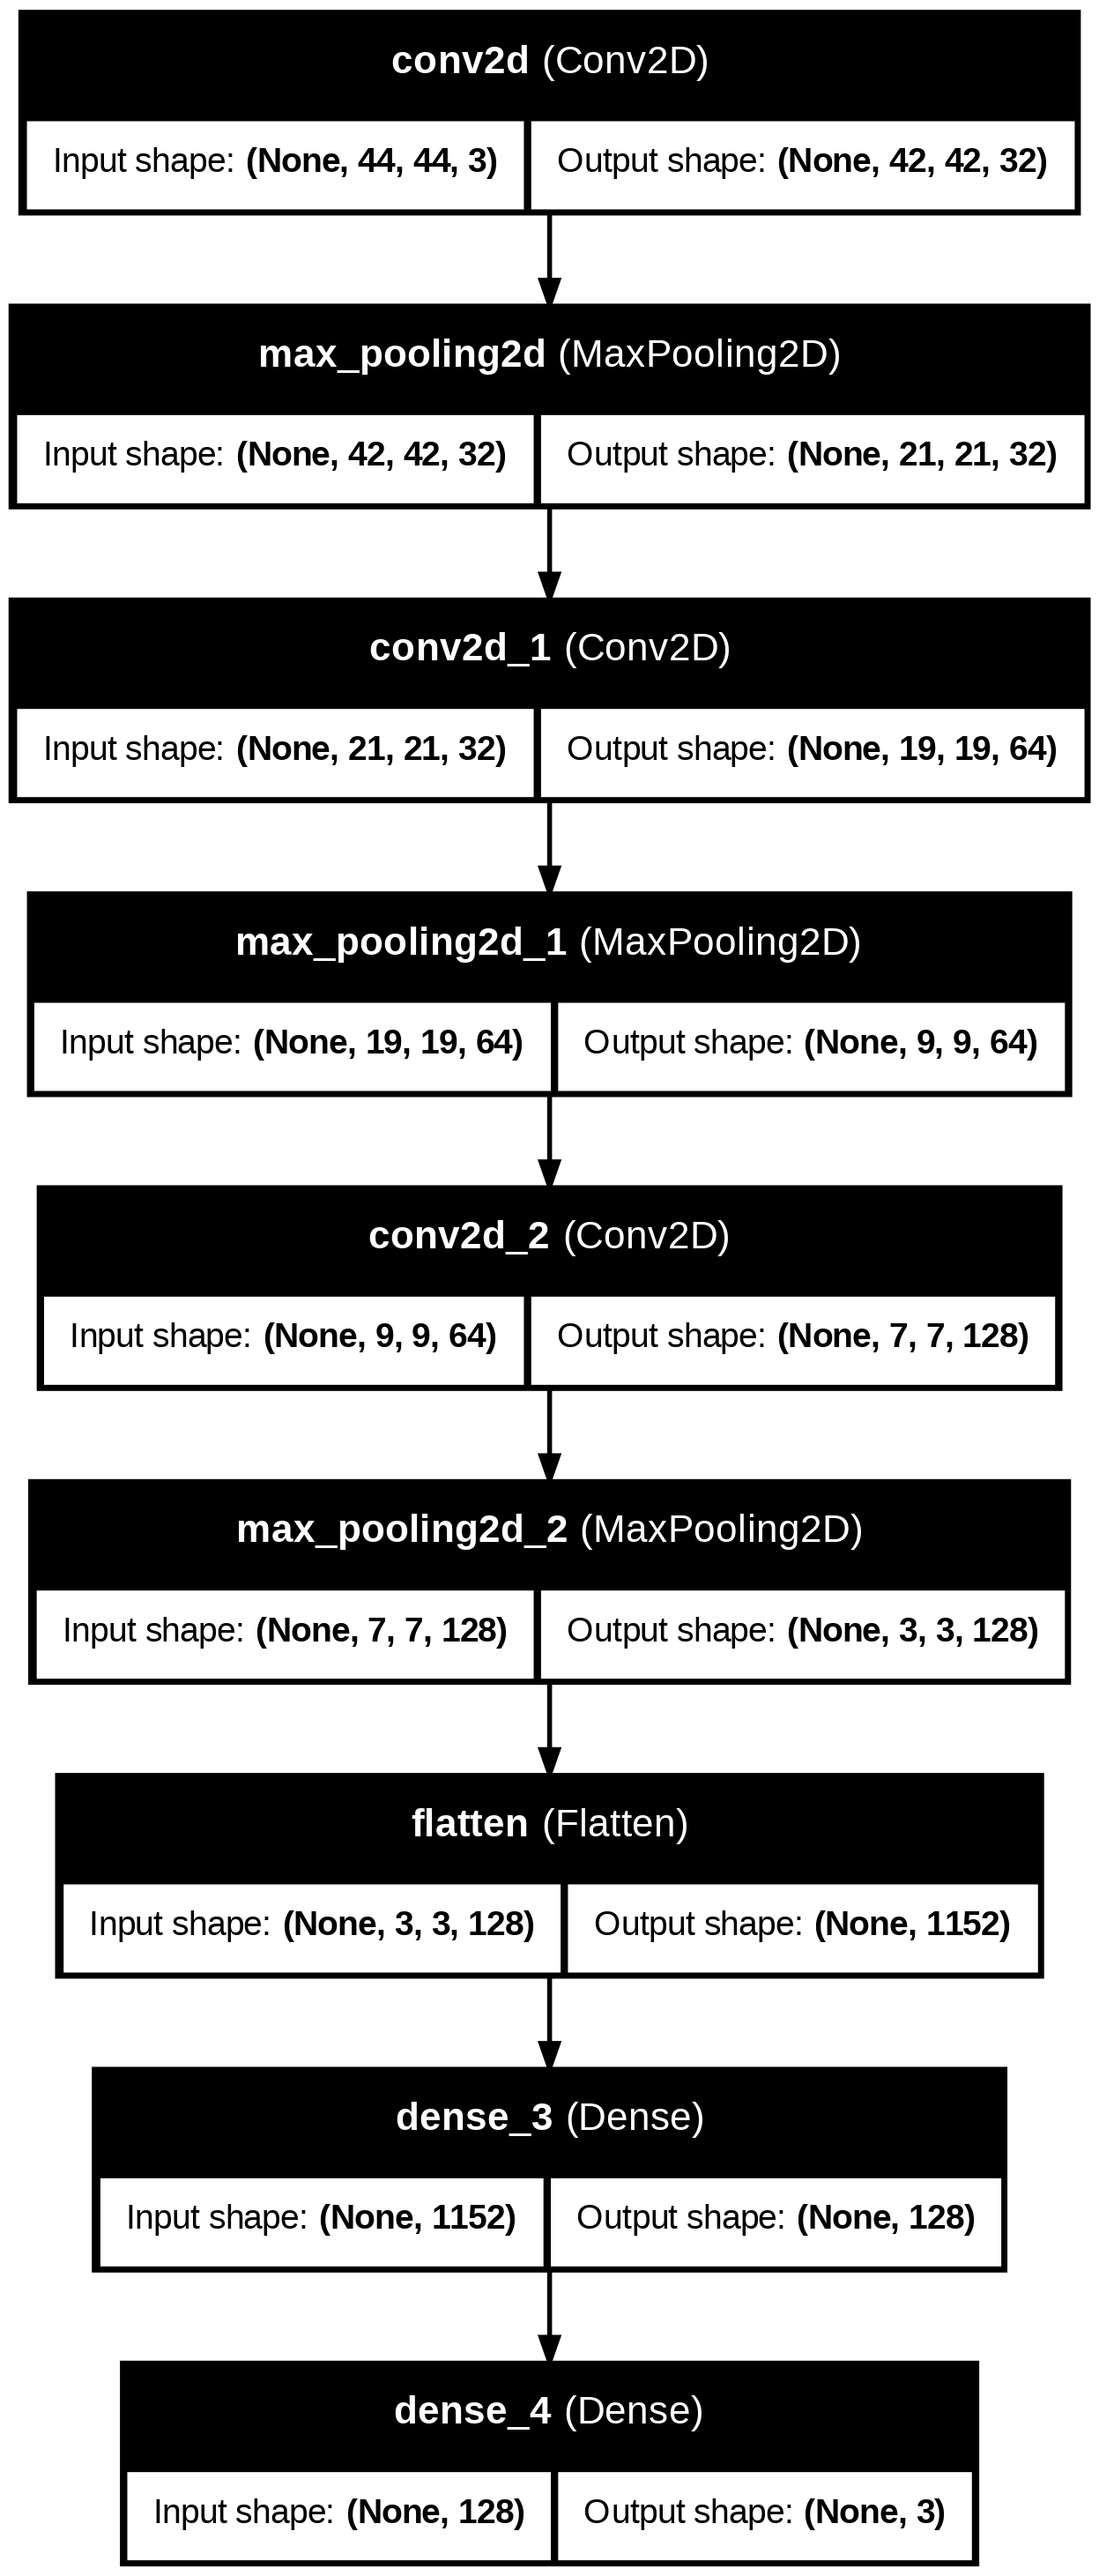

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualiza el modelo y guarda la imagen en 'model_cnn.png'
plot_model(model_cnn, to_file='model_cnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 52.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


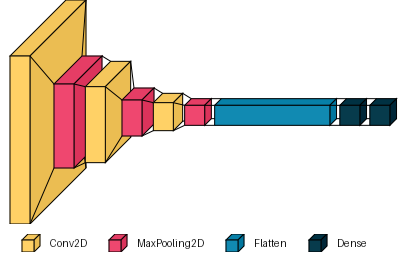

In [ ]:
import visualkeras

# Genera y guarda la visualización de la arquitectura en un archivo PNG
visualkeras.layered_view(model_cnn, to_file='model_cnn_visual.png', legend=True)